Fitting 10 folds for each of 81 candidates, totalling 810 fits
Best parameters found:  {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 70}
Best cross-validation score:  -1.3935028713587827
Best MSE score:  -1.3935028713587827


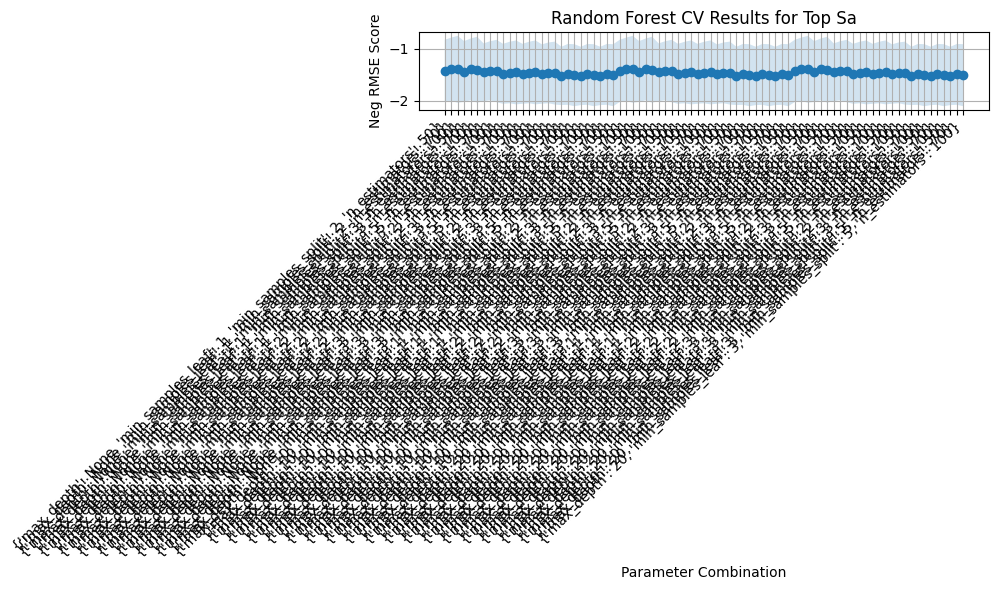

Fitting 10 folds for each of 81 candidates, totalling 810 fits
Best parameters found:  {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Best cross-validation score:  -3.9295111676605203
Best MSE score:  -3.9295111676605203


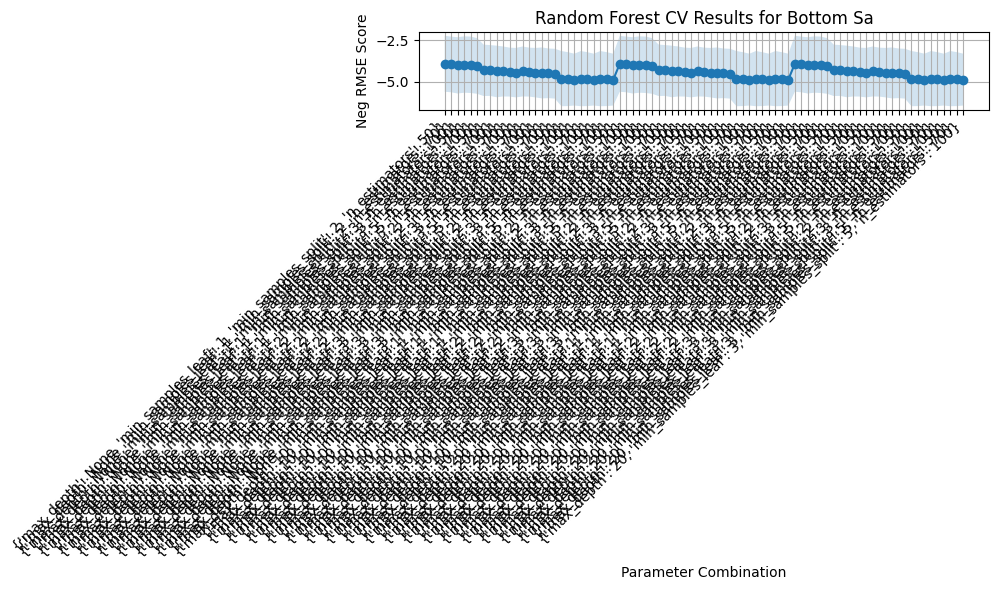

Fitting 10 folds for each of 81 candidates, totalling 810 fits
Best parameters found:  {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Best cross-validation score:  -1.2693849761198903
Best MSE score:  -1.2693849761198903


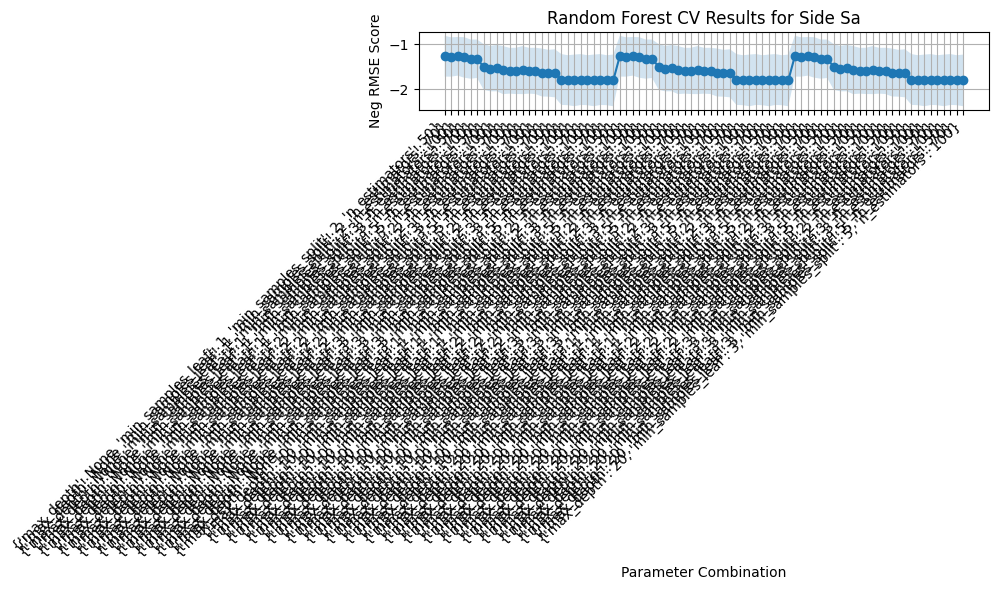

Fitting 10 folds for each of 81 candidates, totalling 810 fits
Best parameters found:  {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best cross-validation score:  -0.5356153518148558
Best MSE score:  -0.5356153518148558


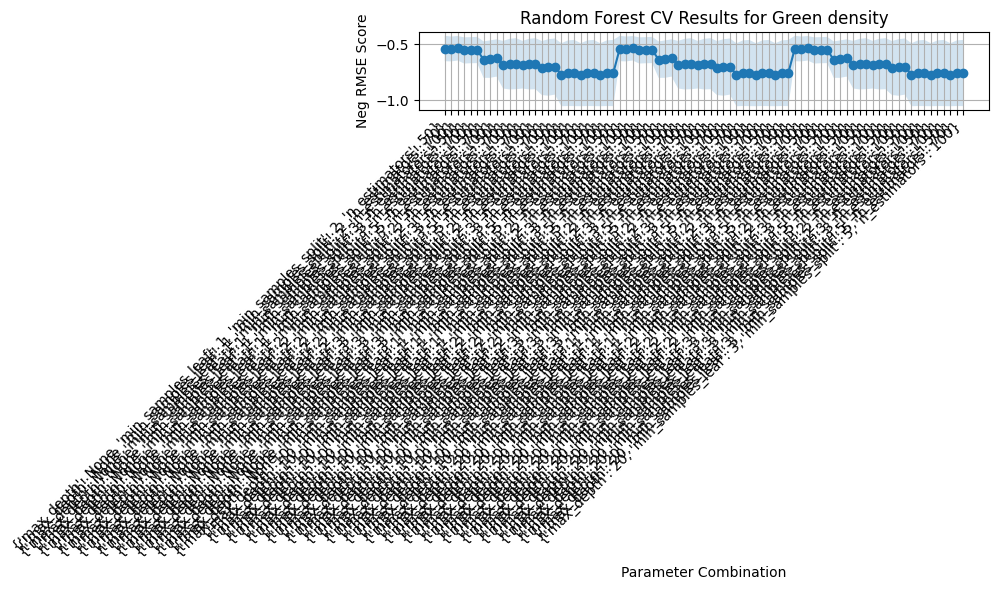

Model Performance (Test Set):
                     MSE        R2      RMSE
Top Sa          1.787079  0.731756  1.336817
Bottom Sa      10.105774  0.896976  3.178958
Side Sa         3.626507  0.737875  1.904339
Green density   0.383821  0.897962  0.619533


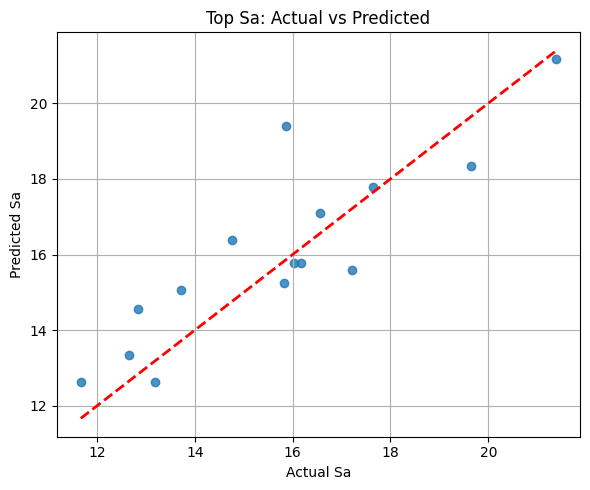

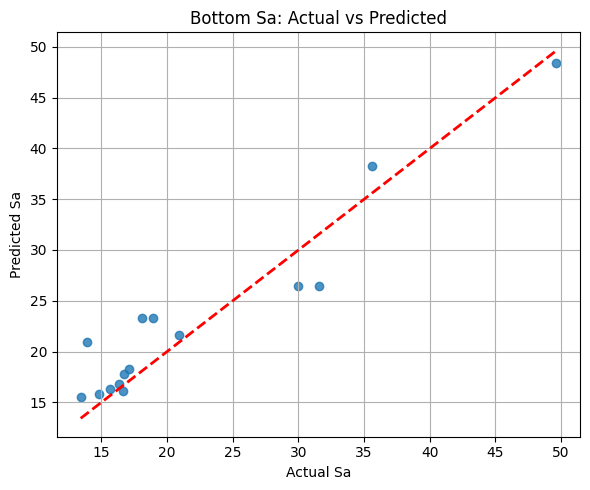

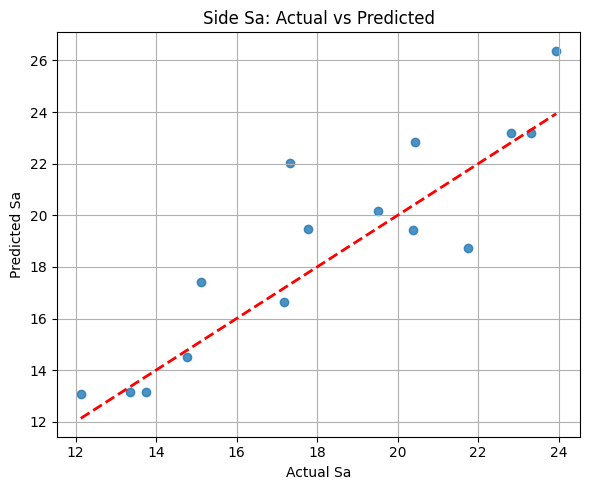

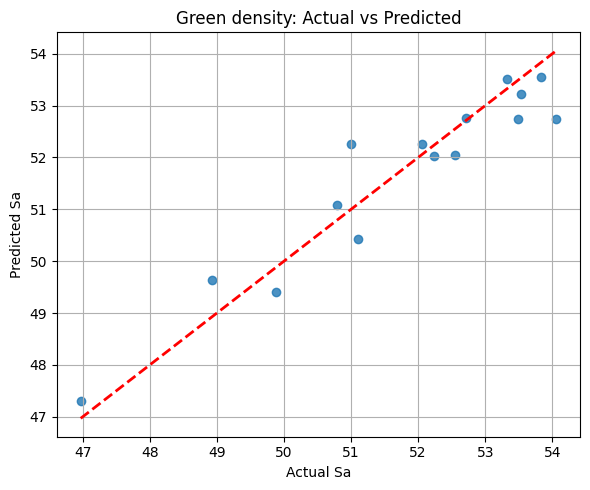

In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings("ignore")

file_path = "BJT_DATA_Ertiza1.xlsx"  
df = pd.read_excel(file_path)


X = df[['BS', 'LT', 'DT', 'RTS', 'RRS']]  # Process parameters
y = df[['Top Sa', 'Bottom Sa', 'Side Sa','Green density']]  # Target Sa values


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


models_RF = {}
predictions = {}
results_RF = {}

for col in y.columns:
    grid = True
    if grid:
        
        param_grid = {
            'n_estimators': [50,70,100],
            'max_depth': [None, 10,20],
            'min_samples_split': [2, 3,5],
            'min_samples_leaf': [1, 2, 3],
            
            
        }
        rf = RandomForestRegressor(random_state=42)
        grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=10,n_jobs=-1, verbose=1, scoring='neg_root_mean_squared_error')
        grid_search.fit(X_train_scaled, y_train[col])
        print("Best parameters found: ", grid_search.best_params_)
        print("Best cross-validation score: ", grid_search.best_score_)
        model_RF = grid_search.best_estimator_
        cv_results = grid_search.cv_results_
        #print(cv_results)
        #print best r2 score 
        print("Best MSE score: ", cv_results['mean_test_score'][grid_search.best_index_])
        
        plt.figure(figsize=(10, 6))
        plt.plot(cv_results['mean_test_score'], marker='o', label='Mean Test Score')
        plt.fill_between(range(len(cv_results['mean_test_score'])),
                         cv_results['mean_test_score'] - cv_results['std_test_score'],
                         cv_results['mean_test_score'] + cv_results['std_test_score'], alpha=0.2)
        plt.title(f"Random Forest CV Results for {col}")
        plt.xlabel("Parameter Combination")
        plt.ylabel("Neg RMSE Score")
        plt.xticks(range(len(cv_results['mean_test_score'])), cv_results['params'], rotation=45, ha='right')
        plt.grid(True)
        plt.tight_layout()
        plt.show()
    elif not grid:
        model_RF = RandomForestRegressor(random_state=42)

    model_RF.fit(X_train_scaled, y_train[col])

    y_pred = model_RF.predict(X_test_scaled)

    predictions[col] = y_pred
    models_RF[col] = model_RF
    rmse= np.sqrt(mean_squared_error(y_test[col], y_pred))
    #rint(f"RMSE for {col}: {rmse:.2f}")
    mse = mean_squared_error(y_test[col], y_pred)
    r2 = r2_score(y_test[col], y_pred)
    results_RF[col] = {"MSE": mse, "R2": r2, "RMSE": rmse}


results_df = pd.DataFrame(results_RF).T
print("Model Performance (Test Set):")
print(results_df)


for col in y.columns:
    plt.figure(figsize=(6, 5))
    plt.scatter(y_test[col], predictions[col], alpha=0.8)
    plt.plot([y_test[col].min(), y_test[col].max()],
             [y_test[col].min(), y_test[col].max()],
             'r--', lw=2)
    plt.xlabel("Actual Sa")
    plt.ylabel("Predicted Sa")
    plt.title(f"{col}: Actual vs Predicted")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

In [ ]:

new_input = {
    'BS': 125,
    'LT': 50,
    'DT': 15,
    'RTS': 35,
    'RRS': 350
}


new_input_df = pd.DataFrame([new_input])


new_input_scaled = scaler.transform(new_input_df)


new_predictions = {}
for col in y.columns:
    pred = models_RF[col].predict(new_input_scaled)[0]
    new_predictions[col] = pred

# Display predictions
print("Predicted Surface Roughness (Sa) for the given input:")
for surface, value in new_predictions.items():
    print(f"{surface}: {value:.3f}")

Predicted Surface Roughness (Sa) for the given input:
Top Sa: 13.113
Bottom Sa: 19.815
Side Sa: 12.260
Green density: 53.500


# XGBoost

Fitting 10 folds for each of 1500 candidates, totalling 15000 fits
Best parameters found:  {'gamma': np.float64(0.25), 'learning_rate': np.float64(0.0575), 'max_depth': 5, 'n_estimators': 50, 'subsample': np.float64(1.0)}
Best cross-validation score:  -1.3126240593943082
Best R2 score:  -1.3126240593943082


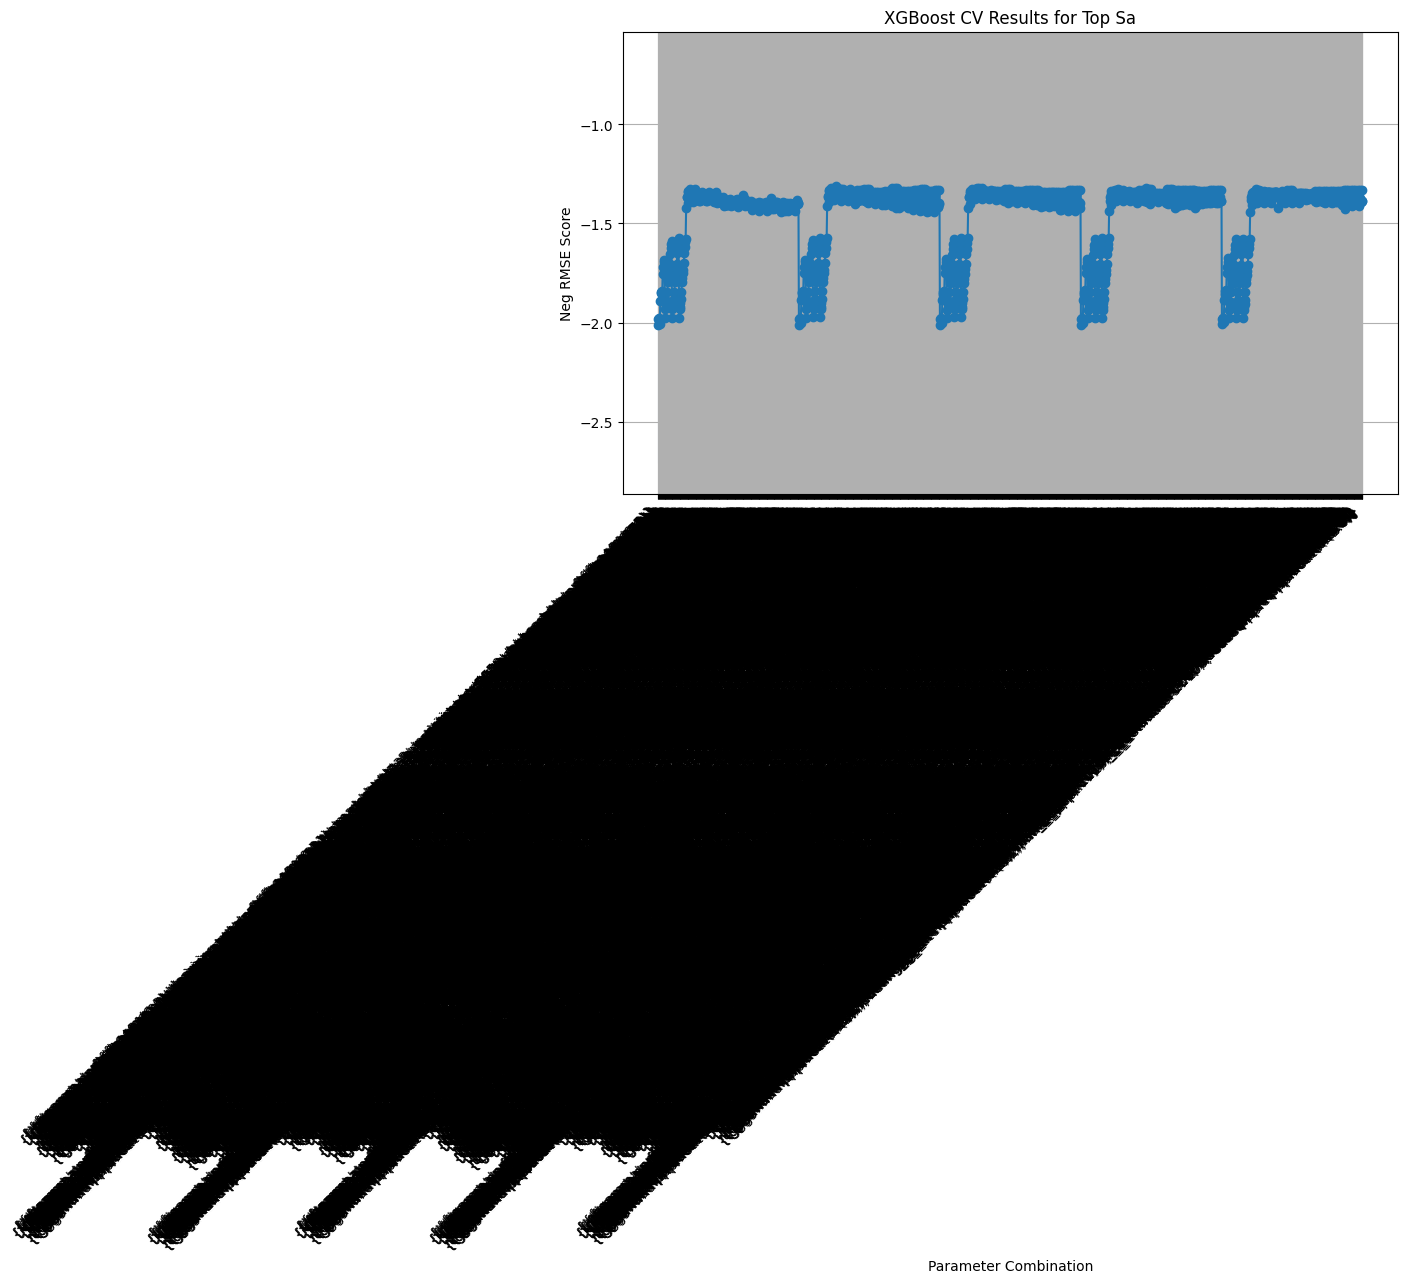

Fitting 10 folds for each of 1500 candidates, totalling 15000 fits
Best parameters found:  {'gamma': np.float64(0.0), 'learning_rate': np.float64(0.0575), 'max_depth': 5, 'n_estimators': 100, 'subsample': np.float64(1.0)}
Best cross-validation score:  -3.707027082873894
Best R2 score:  -3.707027082873894


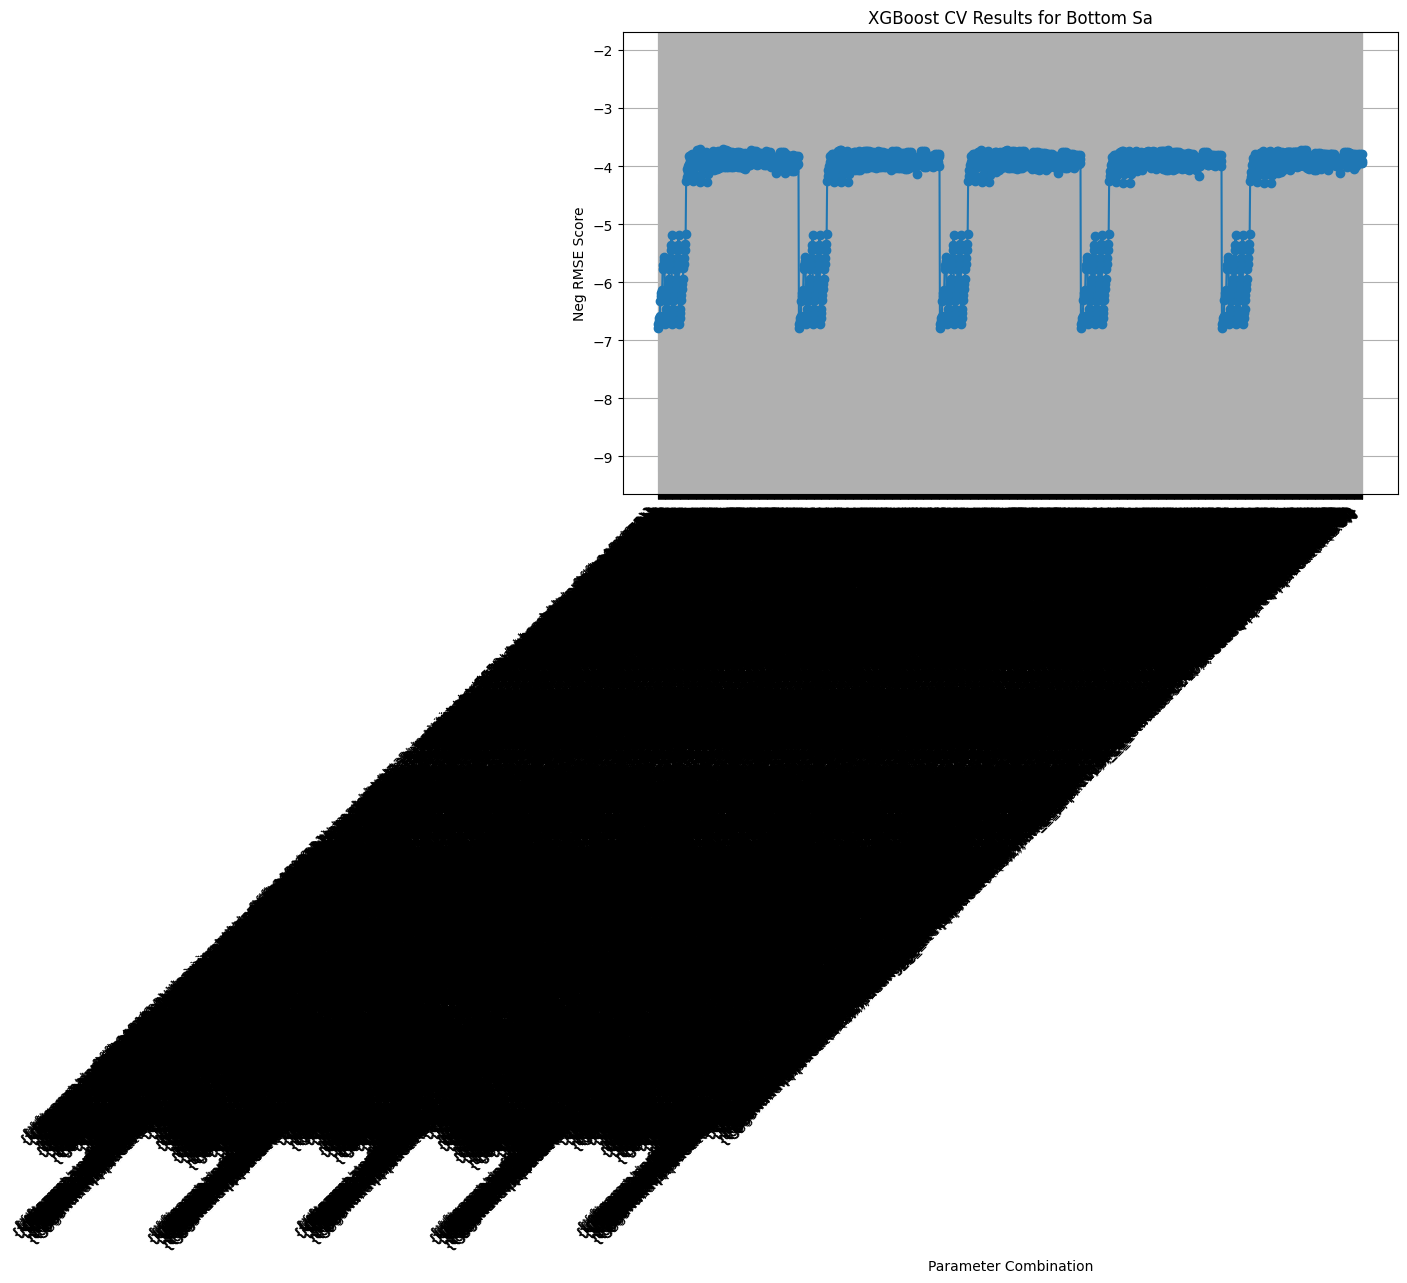

Fitting 10 folds for each of 1500 candidates, totalling 15000 fits
Best parameters found:  {'gamma': np.float64(0.75), 'learning_rate': np.float64(0.2), 'max_depth': 5, 'n_estimators': 50, 'subsample': np.float64(0.625)}
Best cross-validation score:  -0.9612131425343012
Best R2 score:  -0.9612131425343012


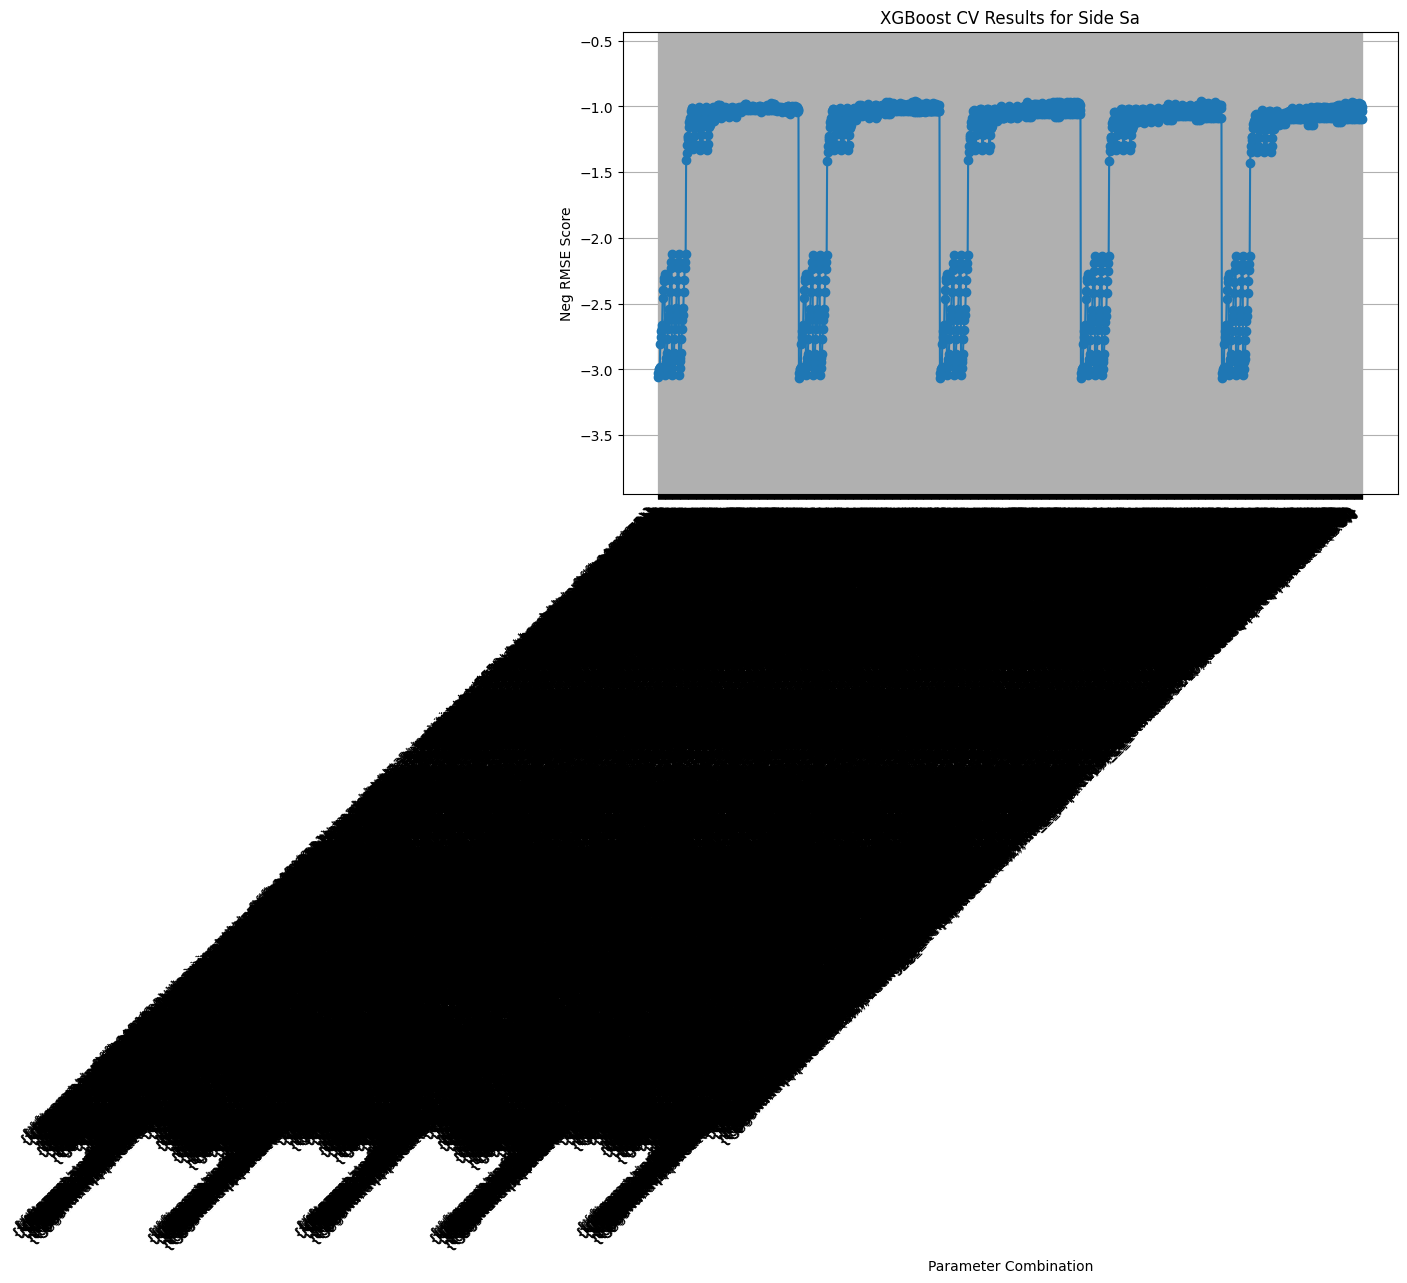

Fitting 10 folds for each of 1500 candidates, totalling 15000 fits
Best parameters found:  {'gamma': np.float64(0.0), 'learning_rate': np.float64(0.2), 'max_depth': 10, 'n_estimators': 70, 'subsample': np.float64(0.75)}
Best cross-validation score:  -0.4507694323105535
Best R2 score:  -0.4507694323105535


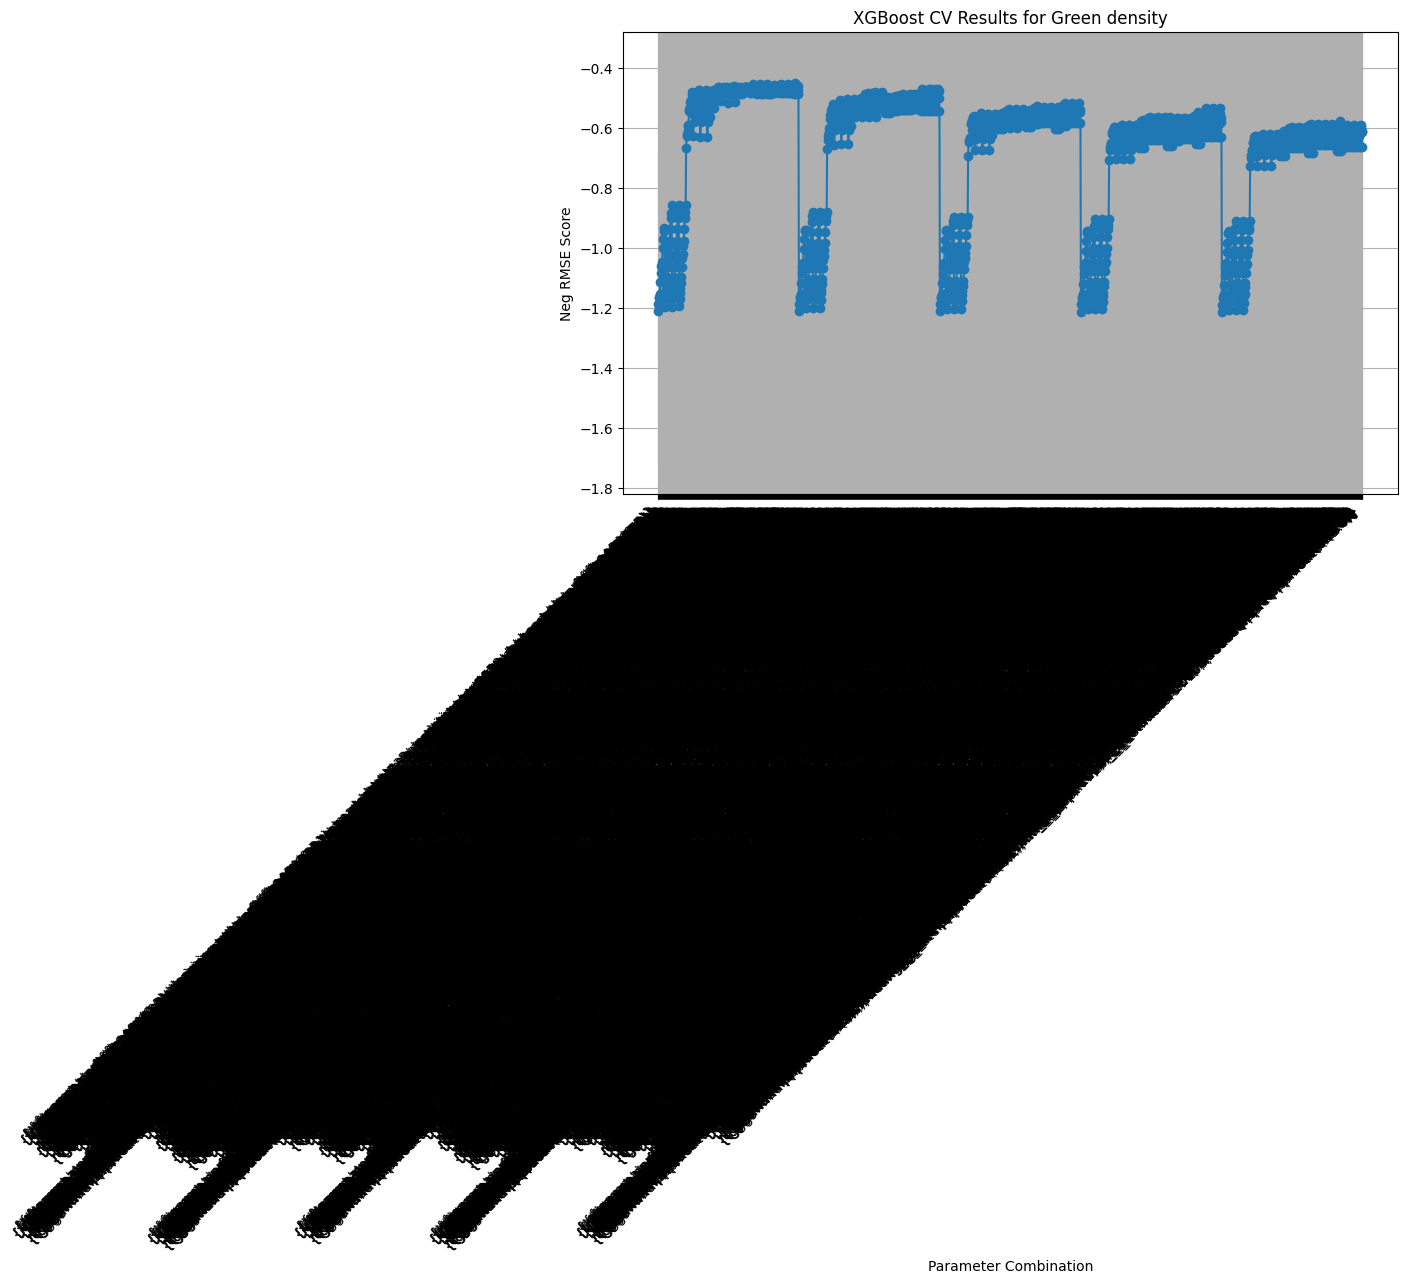

XGBoost Regression Performance (Test Set):
                    MSE        R2      RMSE
Top Sa         1.794133  0.730697  1.339452
Bottom Sa      4.032167  0.958894  2.008026
Side Sa        3.703034  0.732343  1.924327
Green density  0.328863  0.912572  0.573466


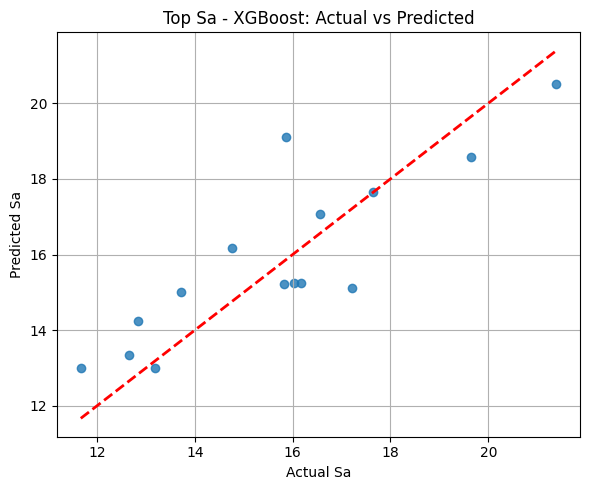

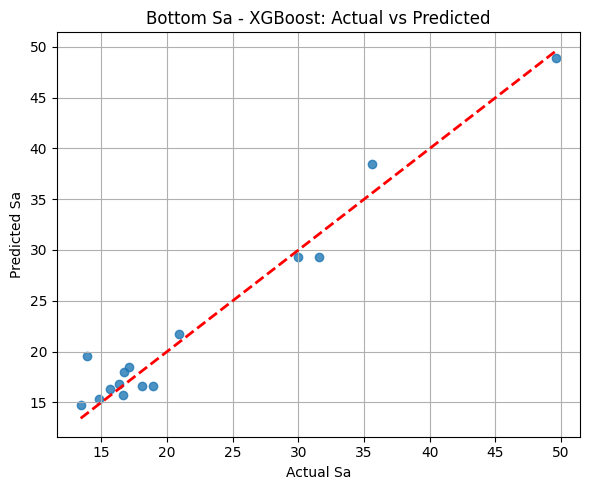

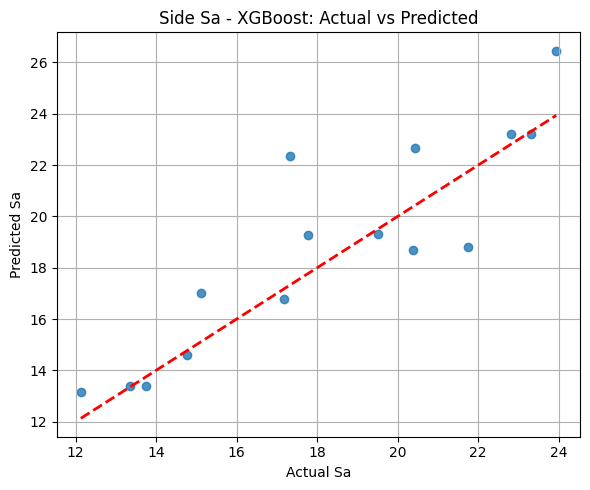

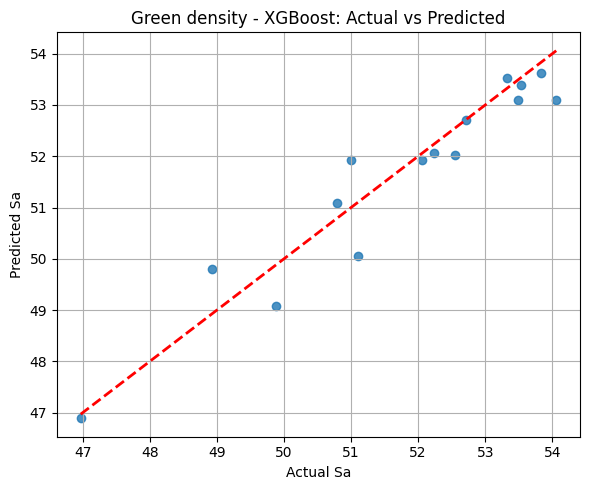

In [ ]:
# Step 1: Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from xgboost import XGBRegressor
import warnings
warnings.filterwarnings("ignore")


file_path = "BJT_DATA_Ertiza1.xlsx"  
df = pd.read_excel(file_path)

# Step 3: Select features and targets
X = df[['BS', 'LT', 'DT', 'RTS', 'RRS']]  # Input parameters
y = df[['Top Sa', 'Bottom Sa', 'Side Sa','Green density']]  # Target Sa values


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


models_XGB = {}
predictions = {}
results_XGB = {}

for col in y.columns:
    grid = False
    if grid== True: 
        param_grid = {
            'n_estimators': [50,70, 100],
            'max_depth': [3, 5, 6,10],
            'learning_rate': np.linspace(0.01, 0.2, 5),
            'gamma': np.linspace(0, 1, 5),
            'subsample': np.linspace(0.5, 1, 5),

        }
        xgb = XGBRegressor(random_state=42)
        grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=10, n_jobs=-1, verbose=2, scoring='neg_root_mean_squared_error')
        grid_search.fit(X_train_scaled, y_train[col])
        print("Best parameters found: ", grid_search.best_params_)
        print("Best cross-validation score: ", grid_search.best_score_)
        model_XGB = grid_search.best_estimator_
        #plot r2 score acorss all folds
        cv_results = grid_search.cv_results_
        #print(cv_results)
        #print r2 score for best parameters
        print("Best R2 score: ", cv_results['mean_test_score'][grid_search.best_index_])
        plt.figure(figsize=(10, 6))
        plt.plot(cv_results['mean_test_score'], marker='o', label='Mean Test Score')
        plt.fill_between(range(len(cv_results['mean_test_score'])),
                         cv_results['mean_test_score'] - cv_results['std_test_score'],
                         cv_results['mean_test_score'] + cv_results['std_test_score'], alpha=0.2)
        plt.title(f"XGBoost CV Results for {col}")
        plt.xlabel("Parameter Combination")
        plt.ylabel("Neg RMSE Score")
        plt.xticks(range(len(cv_results['mean_test_score'])), cv_results['params'], rotation=45, ha='right')
        plt.grid(True)
        plt.tight_layout()
        plt.show()
    elif grid == False:
        model_XGB = XGBRegressor(random_state=42)

    model_XGB.fit(X_train_scaled, y_train[col])
    y_pred = model_XGB.predict(X_test_scaled)

    predictions[col] = y_pred
    models_XGB[col] = model_XGB
    rmse = np.sqrt(mean_squared_error(y_test[col], y_pred))
    mse = mean_squared_error(y_test[col], y_pred)
    r2 = r2_score(y_test[col], y_pred)
    results_XGB[col] = {"MSE": mse, "R2": r2, "RMSE": rmse}


results_df = pd.DataFrame(results_XGB).T
print("XGBoost Regression Performance (Test Set):")
print(results_df)

for col in y.columns:
    plt.figure(figsize=(6, 5))
    plt.scatter(y_test[col], predictions[col], alpha=0.8)
    plt.plot([y_test[col].min(), y_test[col].max()],
             [y_test[col].min(), y_test[col].max()],
             'r--', lw=2)
    plt.xlabel("Actual Sa")
    plt.ylabel("Predicted Sa")
    plt.title(f"{col} - XGBoost: Actual vs Predicted")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

In [ ]:
new_input = {
    'BS': 125,
    'LT': 50,
    'DT': 15,
    'RTS': 35,
    'RRS': 350
}

# Convert to DataFrame
new_input_df = pd.DataFrame([new_input])

r
new_input_scaled = scaler.transform(new_input_df)


new_predictions = {}
for col in y.columns:
    pred = models_XGB[col].predict(new_input_scaled)[0]
    new_predictions[col] = pred


print("Predicted Surface Roughness (Sa) for the given input:")
for surface, value in new_predictions.items():
    print(f"{surface}: {value:.3f}")

Predicted Surface Roughness (Sa) for the given input:
Top Sa: 13.333
Bottom Sa: 23.914
Side Sa: 12.531
Green density: 53.939


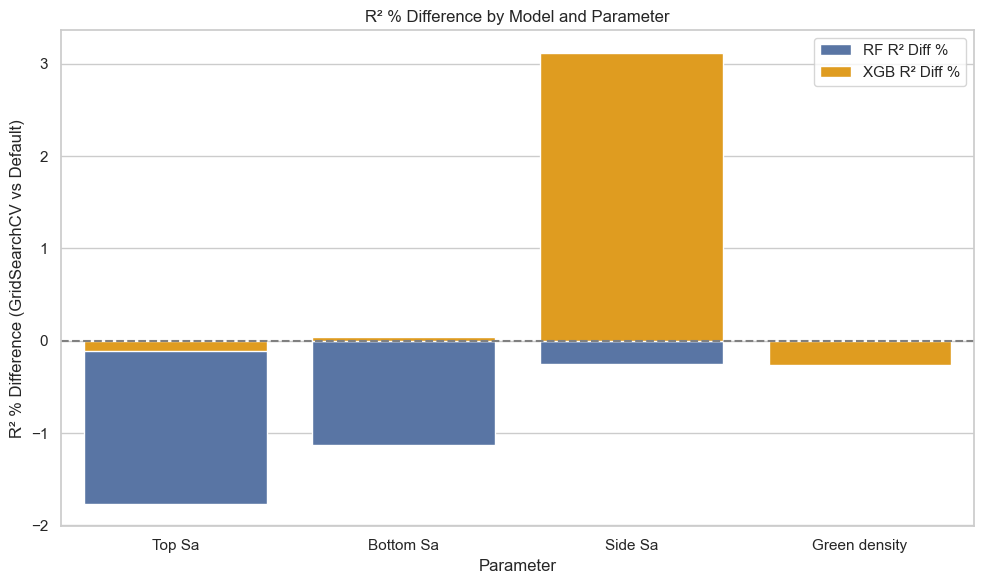

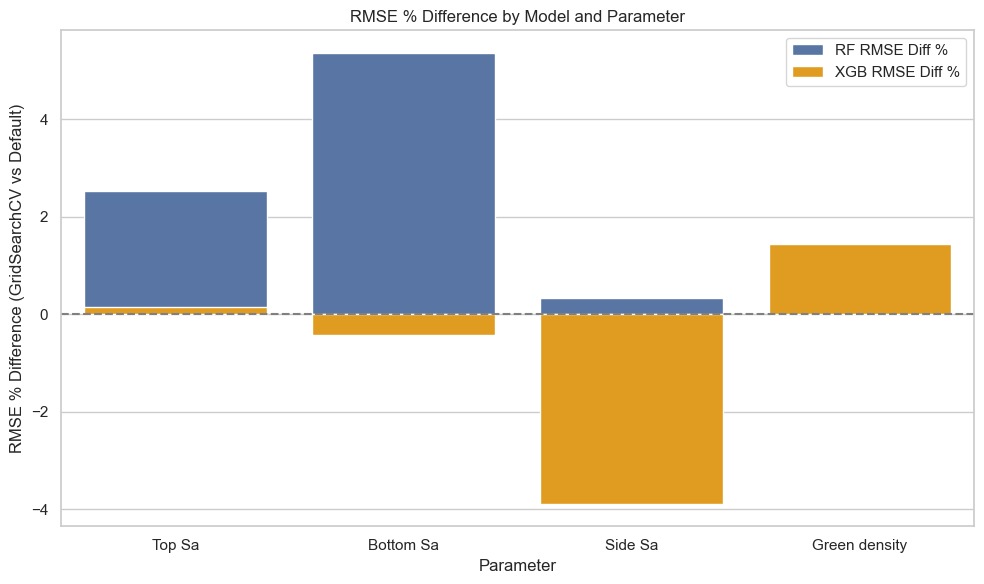

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


data = {
    'Parameter': ['Top Sa', 'Bottom Sa', 'Side Sa', 'Green density'],
    'RF_R2': [0.7449, 0.9072, 0.7397, 0.8981],
    'RF_GS_R2': [0.731756, 0.896976, 0.737875, 0.897962],
    'XGB_R2': [0.7315, 0.9585, 0.7102, 0.9150],
    'XGB_GS_R2': [0.730697, 0.958894, 0.732343, 0.912572],
    'RF_RMSE': [1.3037, 3.0171, 1.8979, 0.6191],
    'RF_GS_RMSE': [1.336817, 3.178958, 1.904339, 0.619533],
    'XGB_RMSE': [1.3375, 2.0167, 2.0022, 0.5653],
    'XGB_GS_RMSE': [1.339452, 2.008026, 1.924327, 0.573466]
}

df = pd.DataFrame(data)

df['RF_R2_diff_%'] = ((df['RF_GS_R2'] - df['RF_R2']) / df['RF_R2']) * 100
df['XGB_R2_diff_%'] = ((df['XGB_GS_R2'] - df['XGB_R2']) / df['XGB_R2']) * 100
df['RF_RMSE_diff_%'] = ((df['RF_GS_RMSE'] - df['RF_RMSE']) / df['RF_RMSE']) * 100
df['XGB_RMSE_diff_%'] = ((df['XGB_GS_RMSE'] - df['XGB_RMSE']) / df['XGB_RMSE']) * 100

import seaborn as sns
import matplotlib.pyplot as plt

# Set plot style
sns.set(style="whitegrid")


plt.figure(figsize=(10, 6))
sns.barplot(x='Parameter', y='RF_R2_diff_%', data=df, label='RF R² Diff %')
sns.barplot(x='Parameter', y='XGB_R2_diff_%', data=df, label='XGB R² Diff %', color='orange')
plt.axhline(0, color='gray', linestyle='--')
plt.ylabel('R² % Difference (GridSearchCV vs Default)')
plt.title('R² % Difference by Model and Parameter')
plt.legend()
plt.tight_layout()
plt.show()


plt.figure(figsize=(10, 6))
sns.barplot(x='Parameter', y='RF_RMSE_diff_%', data=df, label='RF RMSE Diff %')
sns.barplot(x='Parameter', y='XGB_RMSE_diff_%', data=df, label='XGB RMSE Diff %', color='orange')
plt.axhline(0, color='gray', linestyle='--')
plt.ylabel('RMSE % Difference (GridSearchCV vs Default)')
plt.title('RMSE % Difference by Model and Parameter')
plt.legend()
plt.tight_layout()
plt.show()

#import ace_tools as tools; tools.display_dataframe_to_user(name="Model Comparison with % Differences", dataframe=df)


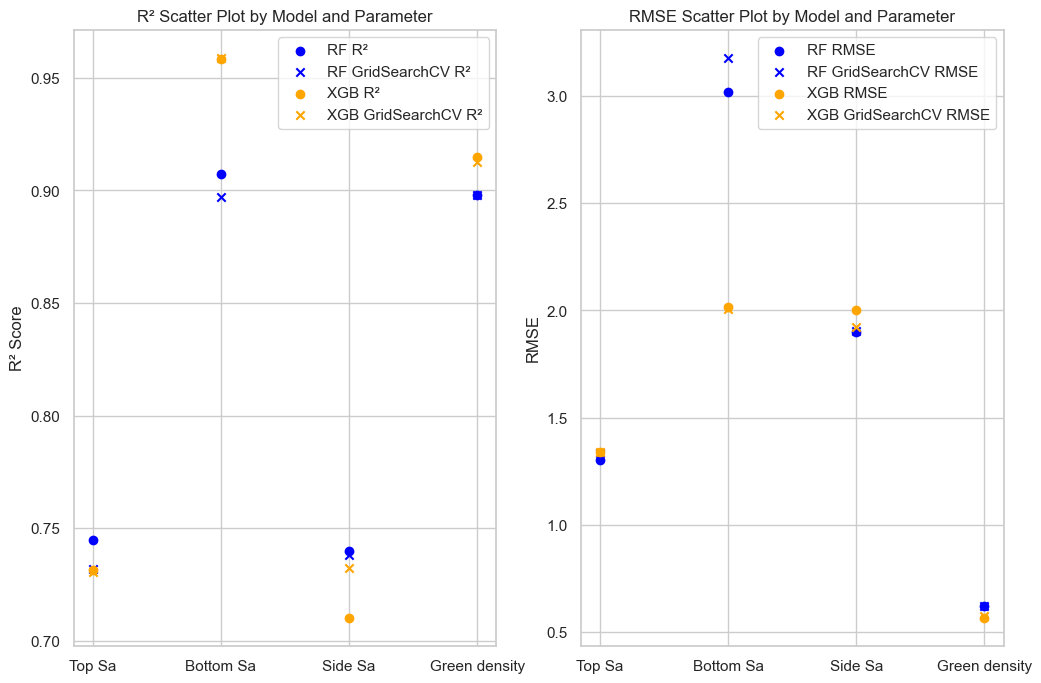

In [ ]:


fig, axes = plt.subplots(1, 2, figsize=(12, 8))

# R² Scatter Plot
axes[0].scatter(df['Parameter'], df['RF_R2'], label='RF R²', color='blue', marker='o')
axes[0].scatter(df['Parameter'], df['RF_GS_R2'], label='RF GridSearchCV R²', color='blue', marker='x')
axes[0].scatter(df['Parameter'], df['XGB_R2'], label='XGB R²', color='orange', marker='o')
axes[0].scatter(df['Parameter'], df['XGB_GS_R2'], label='XGB GridSearchCV R²', color='orange', marker='x')
axes[0].set_title('R² Scatter Plot by Model and Parameter')
axes[0].set_ylabel('R² Score')
axes[0].legend()
axes[0].grid(True)

# RMSE Scatter Plot
axes[1].scatter(df['Parameter'], df['RF_RMSE'], label='RF RMSE', color='blue', marker='o')
axes[1].scatter(df['Parameter'], df['RF_GS_RMSE'], label='RF GridSearchCV RMSE', color='blue', marker='x')
axes[1].scatter(df['Parameter'], df['XGB_RMSE'], label='XGB RMSE', color='orange', marker='o')
axes[1].scatter(df['Parameter'], df['XGB_GS_RMSE'], label='XGB GridSearchCV RMSE', color='orange', marker='x')
axes[1].set_title('RMSE Scatter Plot by Model and Parameter')
axes[1].set_ylabel('RMSE')
axes[1].legend()
axes[1].grid(True)

#plt.tight_layout()
plt.show()


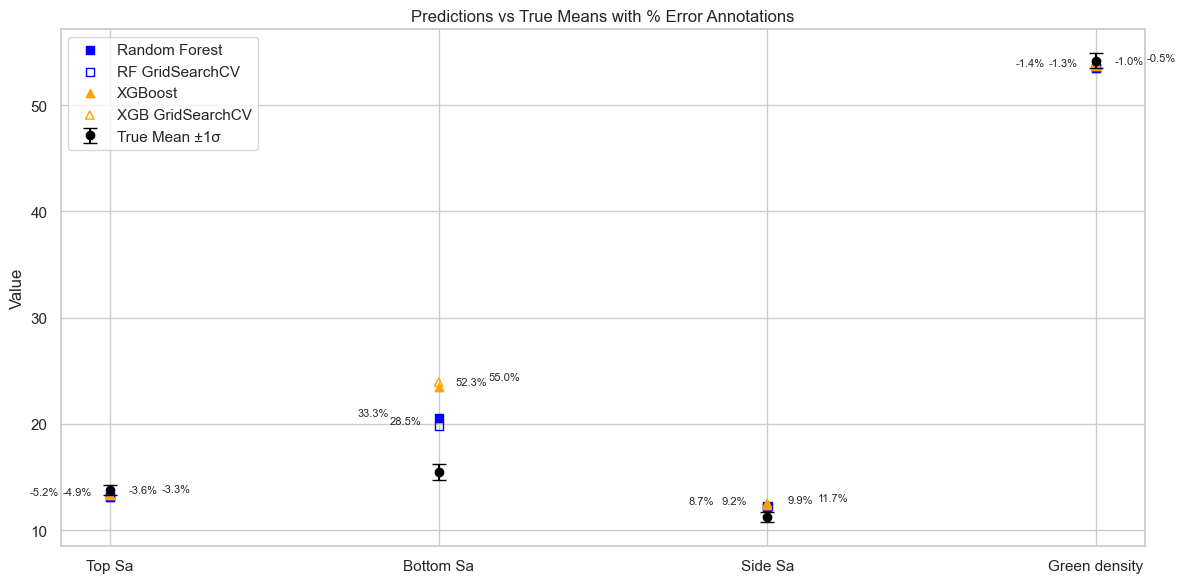

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


data_val = {
    'Parameter': ['Top Sa', 'Bottom Sa', 'Side Sa', 'Green density'],
    'True_Mean': [13.783, 15.426, 11.222, 54.196],
    'True_STD': [0.497, 0.753, 0.499, 0.736],
    'RF': [13.063, 20.557, 12.203, 53.458],
    'RF_GS': [13.113, 19.815, 12.260, 53.500],
    'XGB': [13.287, 23.487, 12.337, 53.661],
    'XGB_GS': [13.333, 23.914, 12.531, 53.939]
}
df_val = pd.DataFrame(data_val)


for model in ['RF', 'RF_GS', 'XGB', 'XGB_GS']:
    df_val[f'{model}_PctErr'] = (df_val[model] - df_val['True_Mean']) / df_val['True_Mean'] * 100

# Plot
plt.figure(figsize=(12, 6))
x = np.arange(len(df_val))

# True values with error bar
plt.errorbar(x, df_val['True_Mean'], yerr=df_val['True_STD'],
             fmt='o', label='True Mean ±1σ', capsize=5, color='black')


plt.scatter(x, df_val['RF'], label='Random Forest', marker='s', color='blue')
plt.scatter(x, df_val['RF_GS'], label='RF GridSearchCV', marker='s', facecolors='none', edgecolor='blue')
plt.scatter(x, df_val['XGB'], label='XGBoost', marker='^', color='orange')
plt.scatter(x, df_val['XGB_GS'], label='XGB GridSearchCV', marker='^', facecolors='none', edgecolor='orange')

offsets = {'RF': -0.2, 'RF_GS': -0.1, 'XGB': 0.1, 'XGB_GS': 0.2}
for i in range(len(df_val)):
    for model, dx in offsets.items():
        pct = df_val.loc[i, f'{model}_PctErr']
        y_val = df_val.loc[i, model]
        plt.text(x[i] + dx, y_val + 0.2, f'{pct:.1f}%', fontsize=8, ha='center')


plt.xticks(x, df_val['Parameter'])
plt.ylabel('Value')
plt.title('Predictions vs True Means with % Error Annotations')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


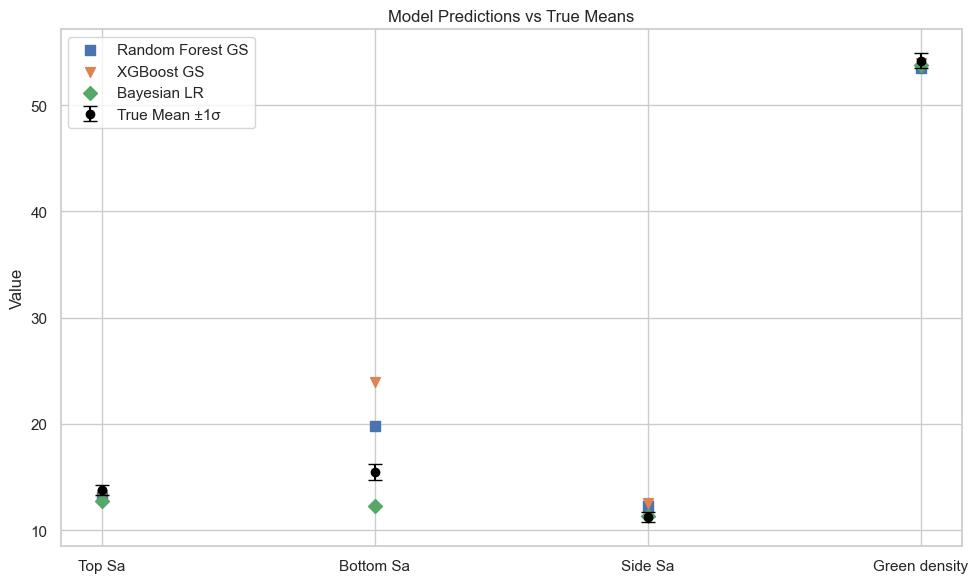

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


data = {
    'Parameter': ['Top Sa', 'Bottom Sa', 'Side Sa', 'Green density'],
    'True_Mean': [13.783, 15.426, 11.222, 54.196],
    'True_STD': [0.497, 0.753, 0.499, 0.736],
    
    'Random Forest GS': [13.113, 19.815, 12.260, 53.500],
    
    'XGBoost GS': [13.333, 23.914, 12.531, 53.939],
    'Bayesian LR': [12.718, 12.273, 11.326, 53.797]
}
df = pd.DataFrame(data)

# Plot predictions vs true means
plt.figure(figsize=(10, 6))
x = np.arange(len(df))

# True values with error bars
plt.errorbar(x, df['True_Mean'], yerr=df['True_STD'],
             fmt='o', label='True Mean ±1σ', capsize=5, color='black')


markers = {
    
    'Random Forest GS': 's',
    'XGBoost GS': 'v',
    'Bayesian LR': 'D'
}


for model, marker in markers.items():
    plt.scatter(x, df[model], label=model, marker=marker, s=50)


plt.xticks(x, df['Parameter'])
plt.ylabel('Value')
plt.title('Model Predictions vs True Means')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
